##데이터 다운로드##

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!wget https://github.com/younggon2/Education-ComputerVision-DeepLearning/raw/master/res/Lung_Segmentation.zip

--2025-02-21 03:41:00--  https://github.com/younggon2/Education-ComputerVision-DeepLearning/raw/master/res/Lung_Segmentation.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/younggon2/Education-ComputerVision-DeepLearning/master/res/Lung_Segmentation.zip [following]
--2025-02-21 03:41:00--  https://media.githubusercontent.com/media/younggon2/Education-ComputerVision-DeepLearning/master/res/Lung_Segmentation.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56097894 (53M) [application/zip]
Saving to: ‘Lung_Segmentation.zip’

Lung_Segmentation.z 100%[===================>] 

In [ ]:
!unzip Lung_Segmentation.zip

Archive:  Lung_Segmentation.zip
  inflating: image/resize_CHNCXR_0001_0.png  
  inflating: image/resize_CHNCXR_0002_0.png  
  inflating: image/resize_CHNCXR_0003_0.png  
  inflating: image/resize_CHNCXR_0004_0.png  
  inflating: image/resize_CHNCXR_0005_0.png  
  inflating: image/resize_CHNCXR_0006_0.png  
  inflating: image/resize_CHNCXR_0007_0.png  
  inflating: image/resize_CHNCXR_0008_0.png  
  inflating: image/resize_CHNCXR_0009_0.png  
  inflating: image/resize_CHNCXR_0010_0.png  
  inflating: image/resize_CHNCXR_0011_0.png  
  inflating: image/resize_CHNCXR_0012_0.png  
  inflating: image/resize_CHNCXR_0013_0.png  
  inflating: image/resize_CHNCXR_0014_0.png  
  inflating: image/resize_CHNCXR_0015_0.png  
  inflating: image/resize_CHNCXR_0016_0.png  
  inflating: image/resize_CHNCXR_0017_0.png  
  inflating: image/resize_CHNCXR_0018_0.png  
  inflating: image/resize_CHNCXR_0019_0.png  
  inflating: image/resize_CHNCXR_0020_0.png  
  inflating: image/resize_CHNCXR_0021_0.png  
  

입력 데이터와 정답 데이터 준비 과정

X_all은 이미지 데이터를 저장하고 있고 픽셀 값이 0에서 255 사이이다.

(np.uint8은 0-255 범위의 값을 저장하는 데이터타입)

RGB이미지는 보통 각 픽셀 값이 0~255 사이의 값을 가짐

(0은 검은색, 255는 흰색)

반면 y_all은 마스크 데이터 (정답 레이블)

보통 0 (배경) 1 (객체) 이렇게 두 개

그렇기 때문에 255로 굳이 나눠줄 필요가 없다.

In [ ]:
#배경과 폐, 두 가지 마스크에 대한 binary segmentation 상황에서의 코드#

import os
import numpy as np

from skimage.io import imread #이미지 파일을 읽어오는 함수
from skimage.transform import resize #이미지 크기를 조정하는 함수
from sklearn.model_selection import train_test_split #데이터셋을 학습, 검증으로 분배하는 함수

#이미지를 256X256X3 으로 조정

IMG_WIDTH = 256 #이미지의 너비 조정
IMG_HEIGHT = 256 #이미지의 높이 조정
IMG_CHANNELS = 3 #컬러 이미지 사용 (RGB,채널 3)

data_path = "/content/"

files = os.listdir(os.path.join(data_path, 'image')) #'image' 폴더 안의 파일들 불러오기
file_headers = []  #파일 이름들을 저장할 리스트

for f in files:
    f1 = os.path.splitext(f)[0] #파일 이름에서 확장자는 제거
    file_headers.append(f1) #리스트에 추가

#print(file_headers)

#전체 이미지 데이터(X)와 레이블 데이터(y)를 저장할 공간 (배열) 을 0으로 초기화
X_all = np.zeros((len(file_headers), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
y_all = np.zeros((len(file_headers), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool) #dtype=bool로 변경 권장

#X_all은 이미지 데이터를 저장 (dtype=np.uint8: 0~255 범위의 정수만 저장)
#0은 검은색, 255는 흰색, 그 사이값은 회색 또는 색상의 밝기
#(원본 이미지 데이터에서는 배경이 0, 폐 마스크가 255)
#y_all은 정답(마스크) 데이터를 저장 (dtype=bool: True/False로 저장)

#파일을 하나씩 읽어가며 X_all, y_all에 저장한다


count = 0 #몇번째 데이터를 처리 중인지 세어주는 변수

#이미지 파일 경로 만들기

for fh in file_headers: #이미지 파일 불러오기
    f1 = os.path.join(data_path, 'image', '{}.png'.format(fh)) #원본 이미지 경로
    l1 = os.path.join(data_path, 'label', '{}.png'.format(fh)) #정답(마스크) 이미지 경로

    img = imread(f1)[:,:,:IMG_CHANNELS] #이미지 읽음과 동시에 RGB 채널만 사용
    mask = imread(l1) #정답마스크 이미지 읽기
    mask = np.expand_dims(mask, axis=-1) #마스크 이미지는 흑백이기 때문에 채널을 추가해 (높이,너비,1) 형태로

    #배열에 이미지와 마스크 저장
    X_all[count] = img #이미지 데이터를 X_all 배열에 저장
    y_all[count] = mask #마스크 데이터를 y_all 배열에 저장

    count += 1  #처리한 이미지 개수 증가

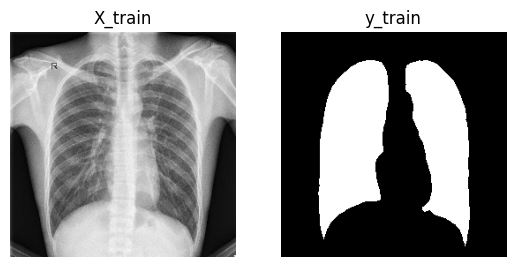

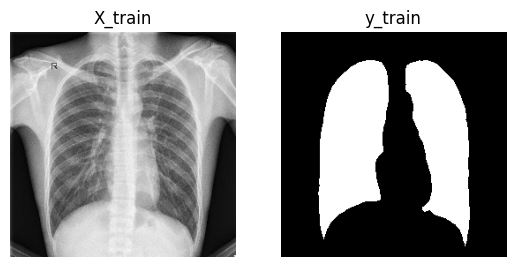

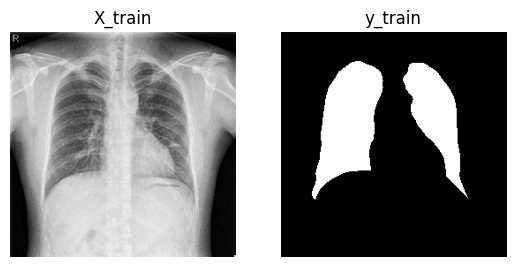

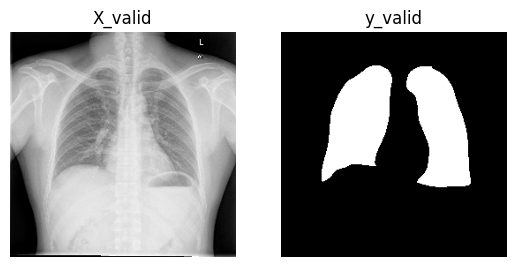

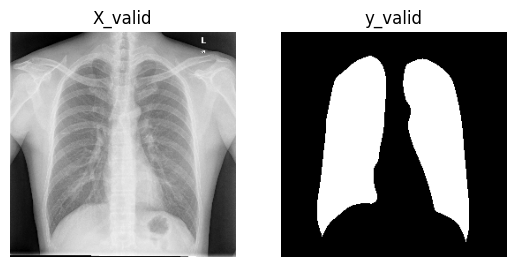

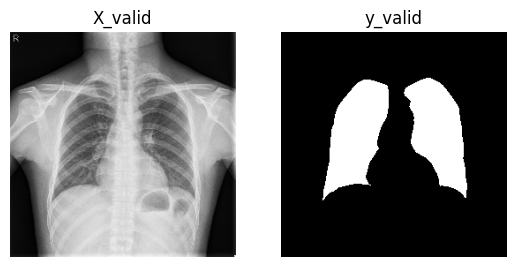

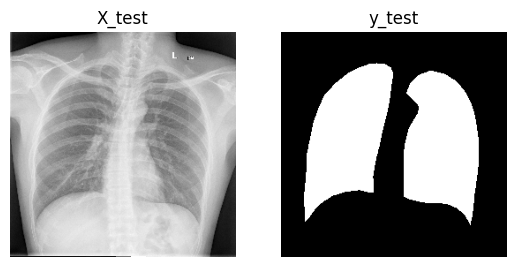

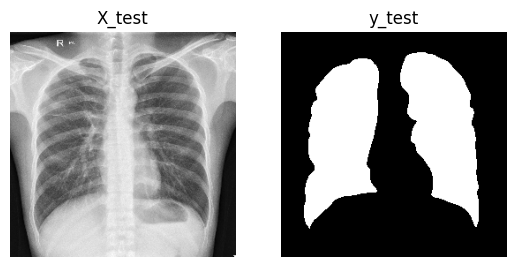

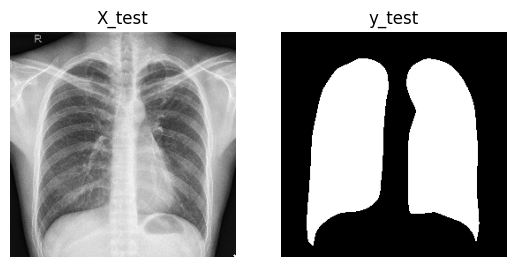

In [ ]:
#binary segmentation에 대한 데이터 시각화#

import matplotlib.pyplot as plt #이미지를 시각화하기 위해 라이브러리 호출

def plotTrainData(a,b,c): #plotTrainData() 함수는 데이터 시각화에 사용
                        #a는 X데이터(이미지 데이터), b는 y데이터(마스크), c는 데이터셋 이름

    for i in range(3): #랜덤하게 3장의 이미지와 마스크를 출력
        ix = np.random.randint(0, len(a)) #0부터 len(a)-1 사이에서 랜덤하게 인덱스 뽑음
        plt.subplot(1,2,1)
        plt.title("X_" + c) #제목을 X_train, X_valid, X_test 이렇게 설정
        plt.imshow(a[ix]) #선택한 X데이터(원본이미지) 출력
        plt.axis('off') #축 없애기
        plt.subplot(1,2,2)
        plt.title("y_" + c)
        plt.imshow(np.squeeze(b[ix]), 'gray') #squeeze 하면 (256,256,1) -> (256,256)으로
        plt.axis('off')
        plt.show() #한 쌍의 이미지와 마스크를 출력

plotTrainData(X_train,y_train, 'train')
plotTrainData(X_valid,y_valid, 'valid')
plotTrainData(X_test,y_test, 'test')

#np.random.randint(0, len(a))가 len(a)-1까지만 나오는 이유는 리스트의 인덱스는 0부터 시작하기 때문
#Numpy 배열의 인덱스는 0부터 시작하기 때문에 유효한 인덱스의 범위는 0~360까지이다.
#배열 범위를 초과하면 IndexError가 뜨게 될것

클래스를 3개로 segmentation 하기 위해서는 y_all의 채널을 3으로 변경하고 one-hot encoding을 해야한다

One-hot encoding을 해야 신경망이 각 픽셀에 대해 레이블을 직접 예측하지 않아도 된다.

그리고 원래 마스크가 표현하는 0,1,2가 수치적 관계로 비쳐 보이지 않을 수 있다.

np.float32는 모델이 클래스 별로 확률을 계산하기 위해 적합한 연산에 걸맞는 dtype

In [ ]:
#배경과 왼쪽, 오른쪽 폐 이렇게 클래스가 3개에 대한 segmentation#

import os
import numpy as np

from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split

IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3

data_path = "/content/"

files = os.listdir(os.path.join(data_path, 'image'))
file_headers = []
for f in files:
    f1 = os.path.splitext(f)[0]
    file_headers.append(f1)

#print(file_headers)

X_all = np.zeros((len(file_headers), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)

y_all = np.zeros((len(file_headers),IMG_HEIGHT,IMG_WIDTH,3),dtype=np.float32)
#클래스를 3개로 만들기 위해 3개의 채널 수를 1-> 3으로 변경하였고 원핫인코딩을 사용하였다.
#클래스에 대한 확률값을 계산하고 처리하기 위해 해당 연산을 수행할 수 있는 np.float32로 dtype을 바꿔준다.

count = 0


for fh in file_headers:
    f1 = os.path.join(data_path, 'image', '{}.png'.format(fh))
    l1 = os.path.join(data_path, 'label', '{}.png'.format(fh))

    img = imread(f1)[:,:,:IMG_CHANNELS]
    mask = imread(l1)
    mask_one_hot = np.zeros((IMG_HEIGHT,IMG_WIDTH,3),dtype=np.float32) #one-hot encoding을 위한 빈 배열 생성

    #각 클래스에 해당하는 픽셀을 원-핫 인코딩 방식으로 변환
    mask_one_hot[:,:,0] = (mask == 0).astype(np.float32) #배경 (라벨 0)
    mask_one_hot[:,:,1] = (mask == 1).astype(np.float32) #왼쪽 폐 (라벨 1)
    mask_one_hot[:,:,2] = (mask == 2).astype(np.float32) #오른쪽 폐 (라벨 2)


    X_all[count] = img
    y_all[count] = mask_one_hot #마스크에 대해 원핫인코딩을 적용하여 y_all 배열에 저장

    count += 1

#근데 결과적으로 이 코드를 실행하여 visualization하면 배경에만 폐 마스크가 검출되고 Left lung과 Right lung에는 검출되지 않음
#그 이유는 마스크의 고유값이 0(검은색) 과 255(흰색) 으로 나누어져 있기 때문에 원본 마스크에서 폐 영역과 배경을 구분해줘야함
#여기에 추가적으로 이미지의 중앙선을 기준으로 왼쪽 폐와 오른쪽 폐를 구분해주기도 해야 한다.

In [ ]:
# 마스크 값 확인
mask = imread(l1)
print("마스크의 고유값:", np.unique(mask))

두 가지 문제점이 있다

1) 원본 데이터의 경우 좌우 구분이 안되어있고

배경은 0 (검은색), 마스크는 255 (흰색) 으로만 되어 있다.

2) 폐 마스크가 배경과 함께 출력이 된다.

이를 해결하기 위해 마스크의 고유값이 0과 255라는 점을 이용해서

배경을 검은색 (255 -> 0) 폐 마스크를 흰색 (0 -> 1) 로 변환 후

좌우구분을 위해 이미지의 중앙선을 mid로 지정 후 이를 기준으로 나눠보려 한다.

In [ ]:
#3개의 class에 대한 segmentation에 mid추가#

#배경과 왼쪽, 오른쪽 폐 이렇게 클래스가 3개에 대한 segmentation#

#이렇게 하면 폐의 왼쪽, 오른쪽이 반대로 출력되는데 이는 X-ray 이미지는 환자를 정면에서 보기 때문

import os
import numpy as np

from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split

IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3

data_path = "/content/"

files = os.listdir(os.path.join(data_path, 'image'))
file_headers = []
for f in files:
    f1 = os.path.splitext(f)[0]
    file_headers.append(f1)

#print(file_headers)

X_all = np.zeros((len(file_headers), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)

y_all = np.zeros((len(file_headers),IMG_HEIGHT,IMG_WIDTH,3),dtype=np.float32)

count = 0


for fh in file_headers:
    f1 = os.path.join(data_path, 'image', '{}.png'.format(fh))
    l1 = os.path.join(data_path, 'label', '{}.png'.format(fh))

    img = imread(f1)[:,:,:IMG_CHANNELS]
    mask = imread(l1)

    mask_one_hot = np.zeros((IMG_HEIGHT,IMG_WIDTH,3),dtype=np.float32)

    #폐 영역(255) 과 배경(0) 의 구분
    lung_mask = (mask == 255).astype(np.float32) #폐 마스크(고유값 255) 을 lung_mask로 지정
    background_mask = (mask == 0).astype(np.float32) #배경 마스크(고유값 0)를 background_mask로 지정

    #mask == 0 mask == 255 는 비교연산으로 True,False 형태로 반환하게 해준다
    #astype(np.float32)는 True면 1, False면 0으로 반환

    #이미지 중앙을 기준으로 왼쪽 / 오른쪽 폐를 구분

    h,w = mask.shape #마스크 이미지의 높이와 너비 가져오기
    mid = w // 2 #이미지의 너비의 절반부를 중앙점으로 계산한다.

    #왼쪽 / 오른쪽 마스크 생성
    left_mask = lung_mask.copy() #전체 폐 마스크를 복사
    left_mask[:,mid:] = 0 #mid를 기준으로 오른쪽을 0으로 설정해 왼쪽 폐만 남겨둔다

    right_mask = lung_mask.copy()
    right_mask[:,:mid] = 0 #mid를 기준으로 왼쪽을 0으로 설정해 오른쪽 폐만 남겨둔다

    #각 채널에 마스크 할당
    mask_one_hot[:,:,0] = background_mask #배경
    mask_one_hot[:,:,1] = left_mask #왼쪽 폐
    mask_one_hot[:,:,2] = right_mask #오른쪽 폐


    X_all[count] = img
    y_all[count] = mask_one_hot

    count += 1


#배열 슬라이싱
#left_mask[:,mid:] 에서 :는 모든 행을 선택, mid:는 mid에서 오른쪽 끝까지의 영역
#right_mask[:,:mid] 에서 :는 모든 행, :mid는 왼쪽 끝에서 mid까지의 영역

X-ray는 환자의 정면에 시선이 맞춰져 있기 때문에 좌우반전이 되어 보인다는 것이 특징이다

그래서 실제로는 왼쪽 폐가 오른쪽 폐로, 오른쪽 폐가 왼쪽 폐로 출력되는데

이를 해결하기 위해 좌우반전을 따로 해주어야 한다.

In [ ]:
#폐의 왼쪽, 오른쪽이 반대로 구분되는것을 디버깅한 코드 (final ver)#

import os
import numpy as np

from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split

IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3 #image를 256X256X3으로 진행

data_path = "/content/"

files = os.listdir(os.path.join(data_path, 'image'))
file_headers = []
for f in files:
    f1 = os.path.splitext(f)[0]
    file_headers.append(f1)

#print(file_headers) #이미지 폴더의 모든 파일들을 불러와 확장자를 제거하여 파일명을 가져온다

X_all = np.zeros((len(file_headers), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)

y_all = np.zeros((len(file_headers),IMG_HEIGHT,IMG_WIDTH,3),dtype=np.float32)

count = 0 #X_all과 y_all이라는 빈 배열을 생성한다.


for fh in file_headers:
    f1 = os.path.join(data_path, 'image', '{}.png'.format(fh))
    l1 = os.path.join(data_path, 'label', '{}.png'.format(fh))

    img = imread(f1)[:,:,:IMG_CHANNELS]
    mask = imread(l1) #f1은 이미지 폴더 상의 경로를 읽어와 img로 지정, l1은 마스크 폴더 상의 경로를 읽어와 mask로 지정

    #마스크를 원핫인코딩으로 변환
    mask_one_hot = np.zeros((IMG_HEIGHT,IMG_WIDTH,3),dtype=np.float32)

    #폐 영역(255)과 배경(0) 의 구분
    lung_mask = (mask == 255).astype(np.float32) #mask의 픽셀 값이 255이면 one-hot encoding으로 1이라고 하고, 나머지는 0
    #픽셀 값이 255인 마스크면 1,
    background_mask = (mask == 0).astype(np.float32) #mask의 픽셀 값이 0이면 one-hot encoding으로 1이라고 하고, 나머지는 0

    #이미지 중앙을 기준으로 왼쪽 / 오른쪽 폐를 구분
    h,w = img.shape[:2] #원본 이미지의 높이와 너비를 각각 h와 w로 지정
    mid = w // 2 #너비를 2로 나눈 지점을 mid라고 지정

    #왼쪽 / 오른쪽 마스크 생성
    right_mask = lung_mask.copy()
    right_mask[:,mid:] = 0 #mid-line 오른쪽을 0으로, 이미지의 왼쪽이 환자의 오른쪽 폐

    left_mask = lung_mask.copy()
    left_mask[:,:mid] = 0 #mid-line 왼쪽을 0, 이미지의 오른쪽이 환자의 왼쪽 폐

    #각 채널에 마스크 할당
    mask_one_hot[:,:,0] = background_mask #배경
    mask_one_hot[:,:,1] = left_mask #왼쪽 폐 (이미지의 오른쪽)
    mask_one_hot[:,:,2] = right_mask #오른쪽 폐 (이미지의 왼쪽)


    X_all[count] = img
    y_all[count] = mask_one_hot

    count += 1

In [ ]:
print("배경 고유값:",np.unique(y_all[0,:,:,0]))
print("왼쪽 폐 고유값:",np.unique(y_all[0,:,:,1]))
print("오른쪽 폐 고유값:",np.unique(y_all[0,:,:,2]))

#np.unique(y_all[0,:,:,0])) 는 첫 번째 이미지의 배경 채널에서
#np.unique(y_all[0,:,:,1]))는 첫 번째 이미지의 왼쪽 폐 채널에서
#np.unique(y_all[0,:,:,2])) 는 첫 번째 이미지의 오른쪽 폐 채널에서

배경 고유값: [0. 1.]
왼쪽 폐 고유값: [0. 1.]
오른쪽 폐 고유값: [0. 1.]


In [ ]:
X_all = X_all.astype('float32') / 255. #255로 나누어 정규화시켜준다 그래서 이미지파일의 고유값을 0-1로 정규화
#y_all = y_all.astype('float32')

In [ ]:
X_all.shape


#(566,256,256,3) 을 해석해보면 566장의 컬러(RGB)이미지가 256X256 크기로 들어있다
#RGB이미지는 channels=3

(566, 256, 256, 3)

In [ ]:
y_all.shape


#(566,256,256,1)을 해석해보면 566장의 마스크이미지(흑백)가 256X256 크기로 들어있다
#흑백이미지는 channels=1

(566, 256, 256, 3)

데이터셋 분배 (학습, 검증, 평가)

In [ ]:
seed = 7 #코드를 여러 번 실행해도 결과가 동일하게 출력되기 위해서 사용
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

#전체 데이터셋 (X_all,y_all) 가운데 80%는 학습용 (X_train,y_train), 20%는 테스트용 (X_test,y_test) 로 나눈다.
#여기서 X_train(452), X_test(114), y_train(452),y_test(114) 이렇게 분배된다
#여기서 추가로 학습데이터 X_train, y_train 각각 452장에서 8:2 비율로 또 검증 데이터 분배
#그렇게 되면 X_train (361), X_valid (91), X_test(114) (y도 이와 동일) 으로 분배된다.

In [ ]:
print('X_train',X_train.shape)
print('X_valid',X_valid.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_valid',y_valid.shape)
print('y_test',y_test.shape)

X_train (361, 256, 256, 3)
X_valid (91, 256, 256, 3)
X_test (114, 256, 256, 3)
y_train (361, 256, 256, 3)
y_valid (91, 256, 256, 3)
y_test (114, 256, 256, 3)


👉 학습 데이터: 모델을 학습시키는 용도

👉 검증 데이터: 학습 중 모델 성능을 점검하는 용도

👉 테스트 데이터: 모델이 진짜 잘 동작하는지 최종 평가하는 용도

이렇게 6:2:2 비율로 학습, 검증, 평가용 데이터를 따로 나누는 이유는

1) Overfitting (과적합) 방지

학습 데이터만 사용하게 되면 모델이 그 데이터만 외워버리는 경향이 있어 검증 데이터로 성능을 체크해가며 일반화 성능을 확인해야함 (cross-validation)

2) 평가 데이터는 모델에게 있어 완전히 새로운 데이터이기 때문에 모델을 최종 평가하는데 있어 적절

3) 하이퍼파라미터 (학습률, 배치 사이즈, 네트워크 구조) 튜닝에 사용

데이터 시각화

In [ ]:
#3개의 클래스에 대한 multi-class segmentation의 시각화#

import matplotlib.pyplot as plt

def plotTrainData(a,b,c):
    for i in range(3):
        ix = np.random.randint(0, len(a))
        plt.figure(figsize=(15,4))

        #원본 이미지
        plt.subplot(1,5,1)
        plt.title("X_" + c)
        plt.imshow(a[ix])
        plt.axis('off')

        #전체 폐 마스크 (왼+오)
        plt.subplot(1,5,2)
        plt.title("Whole Lung Mask")
        plt.imshow(b[ix][:,:,1]+b[ix][:,:,2],'gray') #왼쪽과 오른쪽 폐 동시 출력
        plt.axis('off')

        #Background
        plt.subplot(1,5,3)
        plt.title("Background")
        plt.imshow(b[ix][:,:,0],'gray')
        plt.axis('off')

        #Left Lung Mask
        plt.subplot(1,5,4)
        plt.title("Left Lung")
        plt.imshow(b[ix][:,:,1],'gray')
        plt.axis('off')

        #Right Lung Mask
        plt.subplot(1,5,5)
        plt.title("Right Lung")
        plt.imshow(b[ix][:,:,2],'gray')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

#시각화 실행
plotTrainData(X_train,y_train, 'train')
plotTrainData(X_valid,y_valid, 'valid')
plotTrainData(X_test,y_test, 'test')

2D U-net 모델 설계

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import Add
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
#의료 이미지 분할을 목적으로 2D U-net 모델을 도입

from tensorflow.keras.layers import Concatenate

def unet(input_size=(256,256,3)):
    inputs = Input(input_size)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs) #256X256X3 -> 256X256X32 (32개의 3X3 필터가 연산 수행)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPool2D(pool_size=(2, 2))(conv1) #256X256X32 -> 128X128X32

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #128X128X32 -> 128X128X64
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPool2D(pool_size=(2, 2))(conv2) #128X128X64 -> 64X64X64

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #64X64X64 -> 64X64X128
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPool2D(pool_size=(2, 2))(conv3) #64X64X128 -> 32X32X128

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3) #32X32X128 -> 32X32X256
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    pool4 = MaxPool2D(pool_size=(2, 2))(conv4) #32X32X256 -> 16X16X256

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4) #16X16X256 -> 16X16X512
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5) #16X16X512

#conv1 - conv5까지는 Encoder (Contracting path)이다.
#이 부분에서는 이미지의 크기가 점차 감소(maxpooling)하며 필터 수는 증가한다
#conv1에서는 보통 간단한 특징들을, 5로 갈수록 복잡한 특징(전체 구조) 등을 추출한다

    up6 = Concatenate()([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4]) #16X16X512 -> 32X32X256
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = BatchNormalization()(conv6) #32X32X512
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6) #32X32X256

    up7 = Concatenate()([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3]) #32X32X256 -> 64X64X128
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = BatchNormalization()(conv7) #64X64X256
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7) #64X64X128

    up8 = Concatenate()([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2]) #64X64X128 -> 128X128X64
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = BatchNormalization()(conv8) #128X128X128
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)
    conv8 = BatchNormalization()(conv8) #128X128X64

    up9 = Concatenate()([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1]) #128X128X64 -> 256X256X32
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = BatchNormalization()(conv9) #256X256X64
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)
    conv9 = BatchNormalization()(conv9) #256X256X32

#conv6-conv9 까지는 Decoder (Expanding path)이다
#이 부분은 이미지가 점차 확장되면서 원래 크기로 복원된다
#Concatenate 부분은 skip-connection으로 encoder와 같은 레벨의 특징과 결합 (1-9 2-8 3-7 4-6)


    conv10 = Conv2D(3, (1, 1), activation='softmax')(conv9) #최종 출력층, channels = 3 (배경, 왼쪽, 오른쪽)

    #다중 클래스 분류를 위해 활성화함수를 softmax로 하였다.
    #softmax는 각 픽셀 위치에서 세 클래스의 확률값의 합이 1이 되도록 한다 (각 픽셀이 어느 클래스인지 확률값으로)

    return Model(inputs=[inputs], outputs=[conv10])

모델 컴파일

1) 손실 함수 정의 (Dice loss)

2) 옵티마이저 설정

3) 평가 메트릭 정의

In [ ]:
import tensorflow as tf

def dice_coef(y_true,y_pred,smooth=1.0): #평가지표로는 Dice Coefficient를 사용하였다.
    #segmentation에서 예측된 영역과 실제 영역의 겹치는 정도를 측정
    intersection = tf.reduce_sum(y_true * y_pred, axis = [1,2]) #교집합 계산 (axis =[1,2]는 높이와 너비 방향으로 합계 계산)
    union = tf.reduce_sum(y_true, axis = [1,2]) + tf.reduce_sum(y_pred, axis = [1,2]) #합집합 계산

    #각 클래스별 dice coefficient 계산
    dice = (2 * intersection + smooth) / (union + smooth) #공식 구현
    #모든 클래스에 대해 평균 계산
    return tf.reduce_mean(dice)

def dice_coef_loss(y_true,y_pred):
    return 1 - dice_coef(y_true,y_pred) #Dice loss는 1에서 Dice Coefficient를 뺀 값으로 손실함수로써 정의

In [ ]:
#모델 컴파일
model = unet()
model.compile(
    optimizer = 'adam',
    loss=dice_coef_loss,
    metrics=[dice_coef]
)

모델 학습

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 256, 256, 3))
  warnings.warn(msg)


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - dice_coef: 0.6470 - loss: 0.3530
Epoch 1: val_dice_coef improved from -inf to 0.29777, saving model to lung_segmentation_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 74s 765ms/step - dice_coef: 0.6502 - loss: 0.3498 - val_dice_coef: 0.2978 - val_loss: 0.7018
Epoch 2/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - dice_coef: 0.9353 - loss: 0.0647
Epoch 2: val_dice_coef did not improve from 0.29777
46/46 ━━━━━━━━━━━━━━━━━━━━ 29s 172ms/step - dice_coef: 0.9355 - loss: 0.0644 - val_dice_coef: 0.2866 - val_loss: 0.7130
Epoch 3/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - dice_coef: 0.9548 - loss: 0.0452
Epoch 3: val_dice_coef did not improve from 0.29777
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 174ms/step - dice_coef: 0.9548 - loss: 0.0452 - val_dice_coef: 0.2855 - val_loss: 0.7141
Epoch 4/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - dice_coef: 0.9596 - loss: 0.0404
Epoch 4: val_dice_coef did not improve from 0.29777
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 173ms/step - dice_coef: 0.9596 - loss: 0.0403 - val_dice_coef: 0.2851 - val_loss: 0.7144
Epoch 5/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - dice_coef: 0.9405 - loss: 0.0595
Epoch 5: val_dice_

46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - dice_coef: 0.9409 - loss: 0.0591 - val_dice_coef: 0.4899 - val_loss: 0.5044
Epoch 6/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - dice_coef: 0.9600 - loss: 0.0400
Epoch 6: val_dice_coef did not improve from 0.48990
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - dice_coef: 0.9601 - loss: 0.0399 - val_dice_coef: 0.3165 - val_loss: 0.6814
Epoch 7/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - dice_coef: 0.9629 - loss: 0.0371
Epoch 7: val_dice_coef did not improve from 0.48990
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 175ms/step - dice_coef: 0.9629 - loss: 0.0370 - val_dice_coef: 0.3528 - val_loss: 0.6431
Epoch 8/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - dice_coef: 0.9646 - loss: 0.0354
Epoch 8: val_dice_coef improved from 0.48990 to 0.51328, saving model to lung_segmentation_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 186ms/step - dice_coef: 0.9646 - loss: 0.0354 - val_dice_coef: 0.5133 - val_loss: 0.4764
Epoch 9/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - dice_coef: 0.9654 - loss: 0.0346
Epoch 9: val_dice_coef did not improve from 0.51328
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step - dice_coef: 0.9654 - loss: 0.0345 - val_dice_coef: 0.4732 - val_loss: 0.5174
Epoch 10/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - dice_coef: 0.9662 - loss: 0.0338
Epoch 10: val_dice_coef improved from 0.51328 to 0.60293, saving model to lung_segmentation_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 185ms/step - dice_coef: 0.9662 - loss: 0.0338 - val_dice_coef: 0.6029 - val_loss: 0.3857
Epoch 11/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - dice_coef: 0.9664 - loss: 0.0336
Epoch 11: val_dice_coef improved from 0.60293 to 0.89115, saving model to lung_segmentation_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - dice_coef: 0.9664 - loss: 0.0336 - val_dice_coef: 0.8911 - val_loss: 0.1002
Epoch 12/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - dice_coef: 0.9661 - loss: 0.0339
Epoch 12: val_dice_coef improved from 0.89115 to 0.90817, saving model to lung_segmentation_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 184ms/step - dice_coef: 0.9661 - loss: 0.0339 - val_dice_coef: 0.9082 - val_loss: 0.0865
Epoch 13/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - dice_coef: 0.9672 - loss: 0.0328
Epoch 13: val_dice_coef improved from 0.90817 to 0.95846, saving model to lung_segmentation_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - dice_coef: 0.9672 - loss: 0.0328 - val_dice_coef: 0.9585 - val_loss: 0.0394
Epoch 14/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - dice_coef: 0.9668 - loss: 0.0332
Epoch 14: val_dice_coef did not improve from 0.95846
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 174ms/step - dice_coef: 0.9668 - loss: 0.0332 - val_dice_coef: 0.9326 - val_loss: 0.0672
Epoch 15/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - dice_coef: 0.9665 - loss: 0.0335
Epoch 15: val_dice_coef did not improve from 0.95846
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - dice_coef: 0.9665 - loss: 0.0335 - val_dice_coef: 0.9108 - val_loss: 0.0820
Epoch 16/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - dice_coef: 0.9663 - loss: 0.0337
Epoch 16: val_dice_coef did not improve from 0.95846
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step - dice_coef: 0.9664 - loss: 0.0337 - val_dice_coef: 0.2847 - val_loss: 0.7149
Epoch 17/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - dice_coef: 0.9677 - loss: 0.0323
Epoch 17: v

46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step - dice_coef: 0.9685 - loss: 0.0315 - val_dice_coef: 0.9593 - val_loss: 0.0382
Epoch 20/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - dice_coef: 0.9686 - loss: 0.0314
Epoch 20: val_dice_coef did not improve from 0.95935
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 175ms/step - dice_coef: 0.9686 - loss: 0.0314 - val_dice_coef: 0.9495 - val_loss: 0.0460


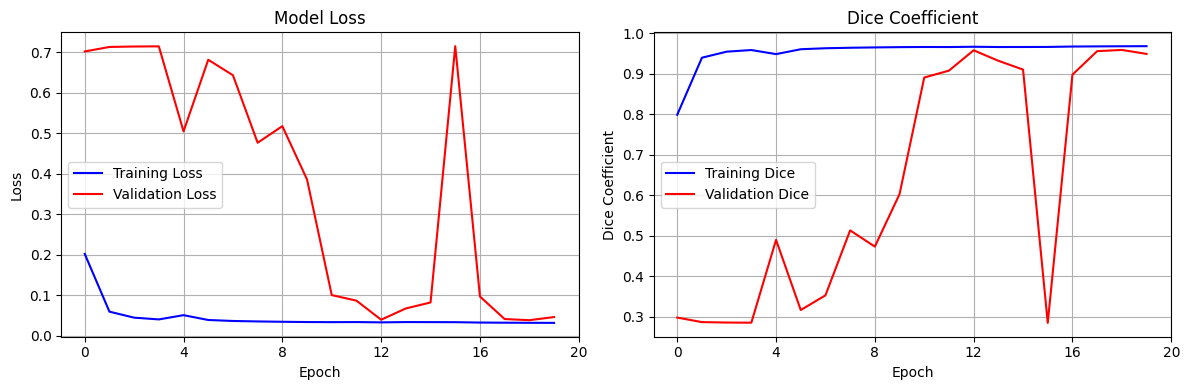

In [ ]:
#재현성을 위한 시드 설정
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate = 1e-4)

#체크포인트만 정의
from tensorflow.keras.callbacks import ModelCheckpoint

callbacks = [
    ModelCheckpoint(
        'lung_segmentation_model.h5',
        monitor='val_dice_coef',
        mode='max',
        save_best_only=True,
        verbose=1
    )
]

#모델 학습
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_valid,y_valid),
    batch_size=8,
    epochs=20,
    callbacks=callbacks,
    verbose=1
)

#학습 과정 시각화
plt.figure(figsize=(12,4))

#loss 그래프
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='Training Loss')
plt.plot(history.history['val_loss'],'r-', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.xticks(range(0, 21, 4))

#Dice coefficient 그래프
plt.subplot(1,2,2)
plt.plot(history.history['dice_coef'],'b-', label='Training Dice')
plt.plot(history.history['val_dice_coef'],'r-', label='Validation Dice')
plt.title('Dice Coefficient')
plt.xlabel('Epoch')
plt.ylabel('Dice Coefficient')
plt.legend()
plt.grid(True)
plt.xticks(range(0, 21, 4))

plt.tight_layout()
plt.show()

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 256, 256, 3))
  warnings.warn(msg)


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - dice_coef: 0.6940 - loss: 0.3061
Epoch 1: val_dice_coef improved from -inf to 0.33429, saving model to lung_segmentation_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 85s 998ms/step - dice_coef: 0.6971 - loss: 0.3030 - val_dice_coef: 0.3343 - val_loss: 0.6660
Epoch 2/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - dice_coef: 0.9496 - loss: 0.0504
Epoch 2: val_dice_coef improved from 0.33429 to 0.38681, saving model to lung_segmentation_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 19s 190ms/step - dice_coef: 0.9497 - loss: 0.0503 - val_dice_coef: 0.3868 - val_loss: 0.6136
Epoch 3/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - dice_coef: 0.9609 - loss: 0.0391
Epoch 3: val_dice_coef did not improve from 0.38681
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - dice_coef: 0.9610 - loss: 0.0390 - val_dice_coef: 0.2840 - val_loss: 0.7155
Epoch 4/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - dice_coef: 0.9617 - loss: 0.0383
Epoch 4: val_dice_coef did not improve from 0.38681
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 184ms/step - dice_coef: 0.9618 - loss: 0.0382 - val_dice_coef: 0.2838 - val_loss: 0.7158
Epoch 5/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - dice_coef: 0.9644 - loss: 0.0356
Epoch 5: val_dice_coef did not improve from 0.38681
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - dice_coef: 0.9644 - loss: 0.0356 - val_dice_coef: 0.2834 - val_loss: 0.7161
Epoch 6/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - dice_coef: 0.9655 - loss: 0.0345
Epoch 6: val_dice

46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 189ms/step - dice_coef: 0.9680 - loss: 0.0320 - val_dice_coef: 0.5993 - val_loss: 0.4114
Epoch 10/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - dice_coef: 0.9652 - loss: 0.0348
Epoch 10: val_dice_coef improved from 0.59926 to 0.72004, saving model to lung_segmentation_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 190ms/step - dice_coef: 0.9653 - loss: 0.0347 - val_dice_coef: 0.7200 - val_loss: 0.2887
Epoch 11/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - dice_coef: 0.9677 - loss: 0.0323
Epoch 11: val_dice_coef improved from 0.72004 to 0.90042, saving model to lung_segmentation_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 193ms/step - dice_coef: 0.9677 - loss: 0.0323 - val_dice_coef: 0.9004 - val_loss: 0.1038
Epoch 12/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - dice_coef: 0.9684 - loss: 0.0316
Epoch 12: val_dice_coef improved from 0.90042 to 0.90091, saving model to lung_segmentation_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - dice_coef: 0.9684 - loss: 0.0316 - val_dice_coef: 0.9009 - val_loss: 0.1028
Epoch 13/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - dice_coef: 0.9691 - loss: 0.0309
Epoch 13: val_dice_coef improved from 0.90091 to 0.90173, saving model to lung_segmentation_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 194ms/step - dice_coef: 0.9691 - loss: 0.0309 - val_dice_coef: 0.9017 - val_loss: 0.1020
Epoch 14/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - dice_coef: 0.9693 - loss: 0.0307
Epoch 14: val_dice_coef did not improve from 0.90173
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - dice_coef: 0.9693 - loss: 0.0307 - val_dice_coef: 0.5916 - val_loss: 0.4203
Epoch 15/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - dice_coef: 0.9692 - loss: 0.0308
Epoch 15: val_dice_coef did not improve from 0.90173
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 184ms/step - dice_coef: 0.9692 - loss: 0.0308 - val_dice_coef: 0.6653 - val_loss: 0.3401
Epoch 16/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - dice_coef: 0.9691 - loss: 0.0309
Epoch 16: val_dice_coef improved from 0.90173 to 0.96428, saving model to lung_segmentation_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 191ms/step - dice_coef: 0.9691 - loss: 0.0309 - val_dice_coef: 0.9643 - val_loss: 0.0364
Epoch 17/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - dice_coef: 0.9686 - loss: 0.0314
Epoch 17: val_dice_coef did not improve from 0.96428
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - dice_coef: 0.9686 - loss: 0.0314 - val_dice_coef: 0.3271 - val_loss: 0.6747
Epoch 18/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - dice_coef: 0.9686 - loss: 0.0314
Epoch 18: val_dice_coef did not improve from 0.96428
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - dice_coef: 0.9686 - loss: 0.0314 - val_dice_coef: 0.8584 - val_loss: 0.1468
Epoch 19/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - dice_coef: 0.9691 - loss: 0.0309
Epoch 19: val_dice_coef did not improve from 0.96428
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - dice_coef: 0.9691 - loss: 0.0309 - val_dice_coef: 0.6150 - val_loss: 0.3858
Epoch 20/20
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - dice_coef: 0.9696 - loss: 0.0304
Epoch 20:

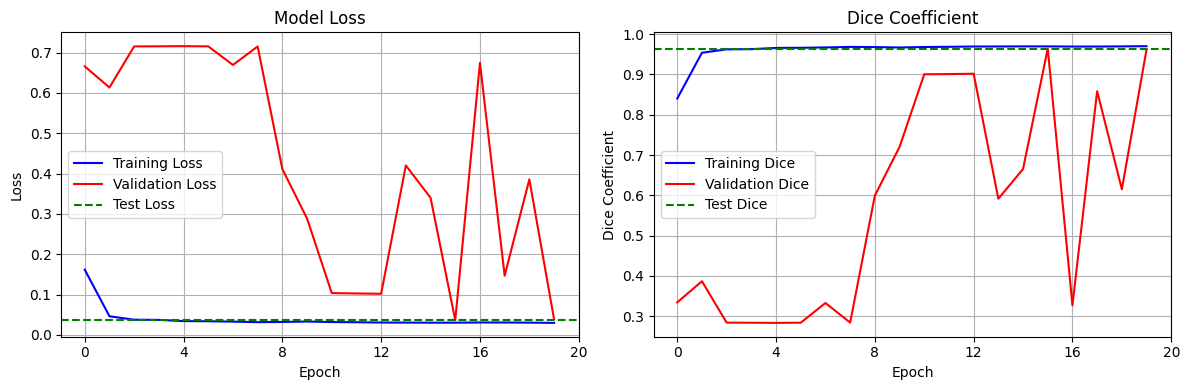

In [ ]:
#test dataset까지 함께#

#재현성을 위한 시드 설정
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate = 1e-4)

#체크포인트만 정의
from tensorflow.keras.callbacks import ModelCheckpoint

callbacks = [
    ModelCheckpoint(
        'lung_segmentation_model.h5',
        monitor='val_dice_coef',
        mode='max',
        save_best_only=True,
        verbose=1
    )
]


#모델 학습
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_valid,y_valid),
    batch_size=8,
    epochs=20,
    callbacks=callbacks,
    verbose=1
)

# 테스트 데이터에 대한 평가
test_results = model.evaluate(X_test, y_test, verbose=0)

# 최종 성능 출력
print("\n=== Final Model Performance ===")
print(f"Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Training Dice Coefficient: {history.history['dice_coef'][-1]:.4f}")
print(f"Validation Loss: {history.history['val_loss'][-1]:.4f}")
print(f"Validation Dice Coefficient: {history.history['val_dice_coef'][-1]:.4f}")
print(f"Test Loss: {test_results[0]:.4f}")
print(f"Test Dice Coefficient: {test_results[1]:.4f}")

#학습 과정 시각화
plt.figure(figsize=(12,4))

#loss 그래프
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='Training Loss')
plt.plot(history.history['val_loss'],'r-', label='Validation Loss')

# 테스트 loss를 수평선으로 표시
plt.axhline(y=test_results[0], color='g', linestyle='--', label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.xticks(range(0, 21, 4))

#Dice coefficient 그래프
plt.subplot(1,2,2)
plt.plot(history.history['dice_coef'],'b-', label='Training Dice')
plt.plot(history.history['val_dice_coef'],'r-', label='Validation Dice')

# 테스트 Dice coefficient를 수평선으로 표시
plt.axhline(y=test_results[1], color='g', linestyle='--', label='Test Dice')
plt.title('Dice Coefficient')
plt.xlabel('Epoch')
plt.ylabel('Dice Coefficient')
plt.legend()
plt.grid(True)
plt.xticks(range(0, 21, 4))

plt.tight_layout()
plt.show()

결과 시각화

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 256, 256, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Training Dice Coefficient: 0.9714


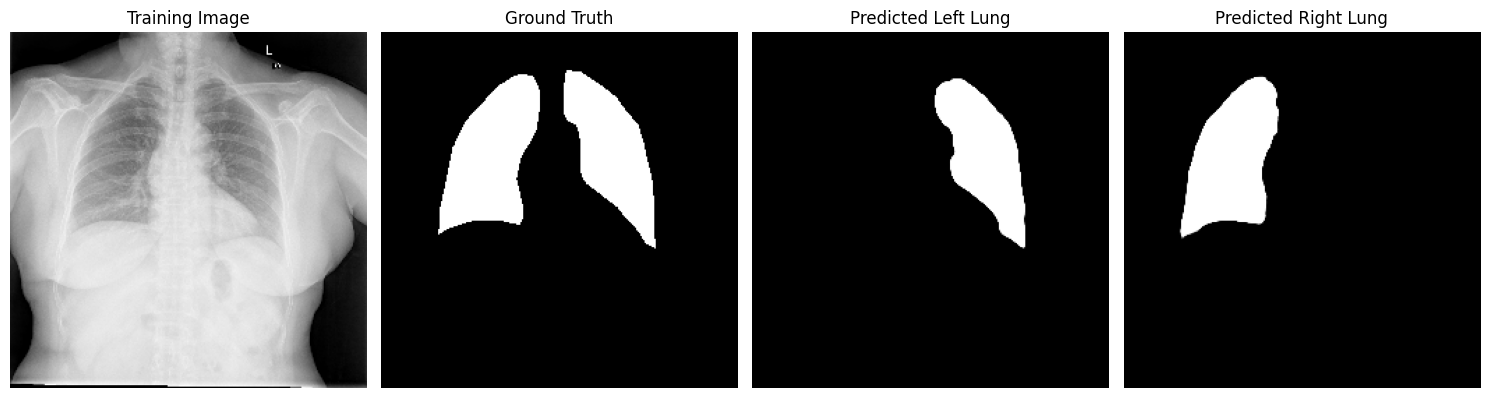

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Validation Dice Coefficient: 0.9727


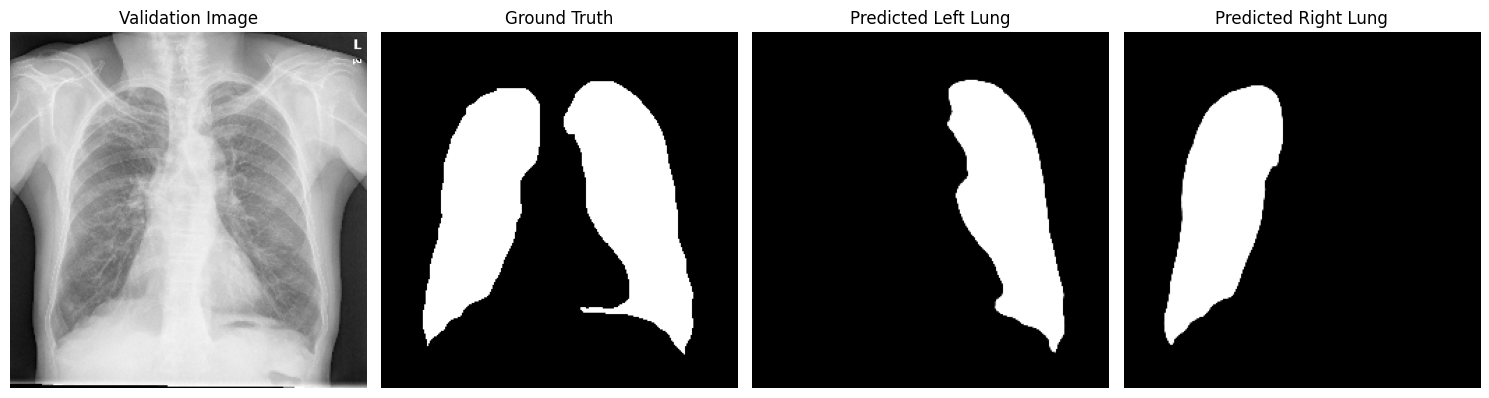

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Test Dice Coefficient: 0.9195


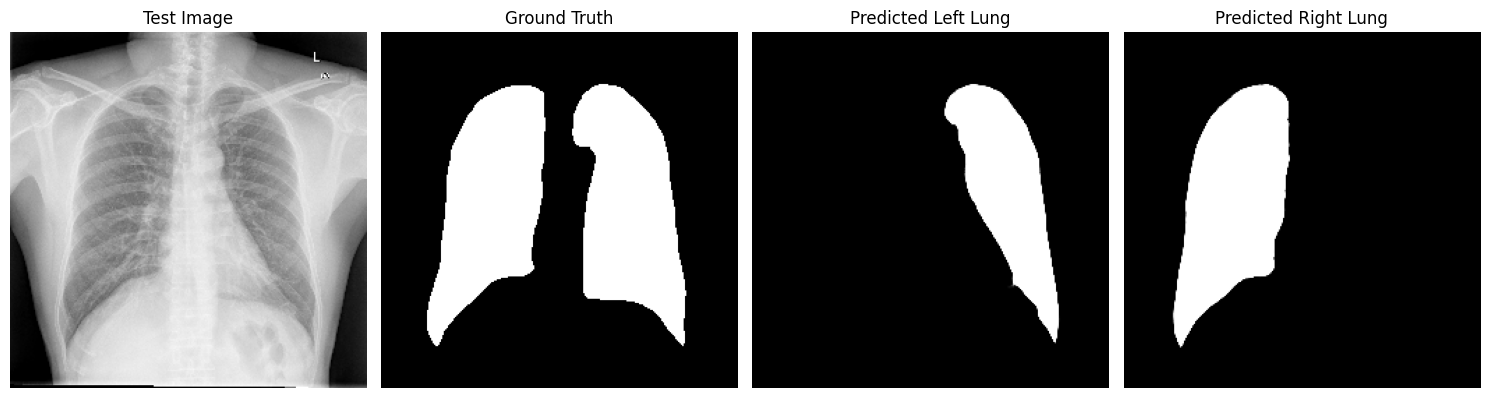

In [ ]:
import matplotlib.pyplot as plt

def plotPredictions(X_train_, y_train_, X_valid_, y_valid_, X_test_, y_test_, model):
    def plot_sample(X,y,pred,title_prefix):
        plt.figure(figsize=(15,5))

        #원본 이미지
        plt.subplot(1,4,1)
        plt.title(f"{title_prefix} Image")
        plt.imshow(X[0])
        plt.axis('off')

        #실제 마스크 (전체 폐)
        plt.subplot(1,4,2)
        plt.title("Ground Truth")

        #왼쪽 오른쪽 폐를 동시에 표시
        plt.imshow(y[0,:,:,1]+y[0,:,:,2], 'gray')
        plt.axis('off')

        #예측 마스크 (왼쪽 폐)
        plt.subplot(1,4,3)
        plt.title("Predicted Left Lung")
        plt.imshow(pred[0,:,:,1], 'gray')
        plt.axis('off')

        #예측 마스크 (오른쪽 폐)
        plt.subplot(1,4,4)
        plt.title("Predicted Right Lung")
        plt.imshow(pred[0,:,:,2],'gray')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    #학습 데이터에서 랜덤 샘플 예측
    ix = np.random.randint(0, len(X_train_))
    input_ = X_train_[ix:ix+1]
    mask_ = y_train_[ix:ix+1]
    preds_train = model.predict(input_)
    ret = model.evaluate(input_, mask_,verbose=0)
    print(f"Training Dice Coefficient: {ret[1]:.4f}")
    plot_sample(input_, mask_, preds_train, "Training")

    #검증 데이터에서 랜덤 샘플 예측
    ix = np.random.randint(0, len(X_valid_))
    input_ = X_valid_[ix:ix+1]
    mask_ = y_valid_[ix:ix+1]
    preds_valid = model.predict(input_)
    ret=model.evaluate(input_, mask_,verbose=0)
    print(f"Validation Dice Coefficient: {ret[1]:.4f}")
    plot_sample(input_, mask_, preds_valid, "Validation")

    #테스트 데이터에서 랜덤 샘플 예측
    ix = np.random.randint(0, len(X_test_))
    input_ = X_test_[ix:ix+1]
    mask_ = y_test_[ix:ix+1]
    preds_test = model.predict(input_)
    ret=model.evaluate(input_, mask_,verbose=0)
    print(f"Test Dice Coefficient: {ret[1]:.4f}")
    plot_sample(input_, mask_, preds_test, "Test")

#모델 예측 결과 시각화
plotPredictions(X_train, y_train, X_valid, y_valid, X_test, y_test, model)

Training Data Predictions:
Training Sample 1 Dice Coefficient: 0.9828


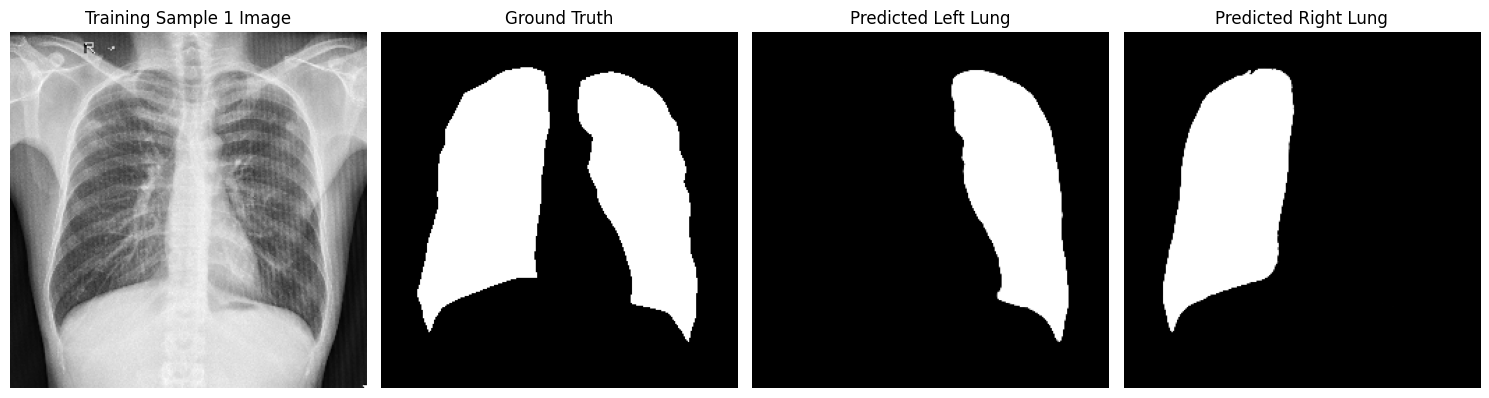

Training Sample 2 Dice Coefficient: 0.9818


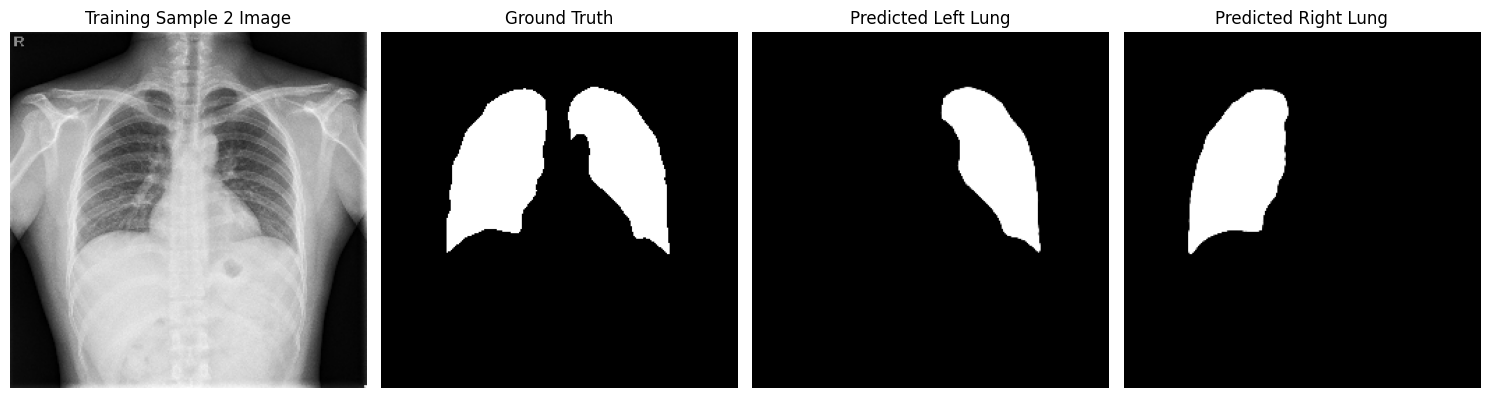

Training Sample 3 Dice Coefficient: 0.9798


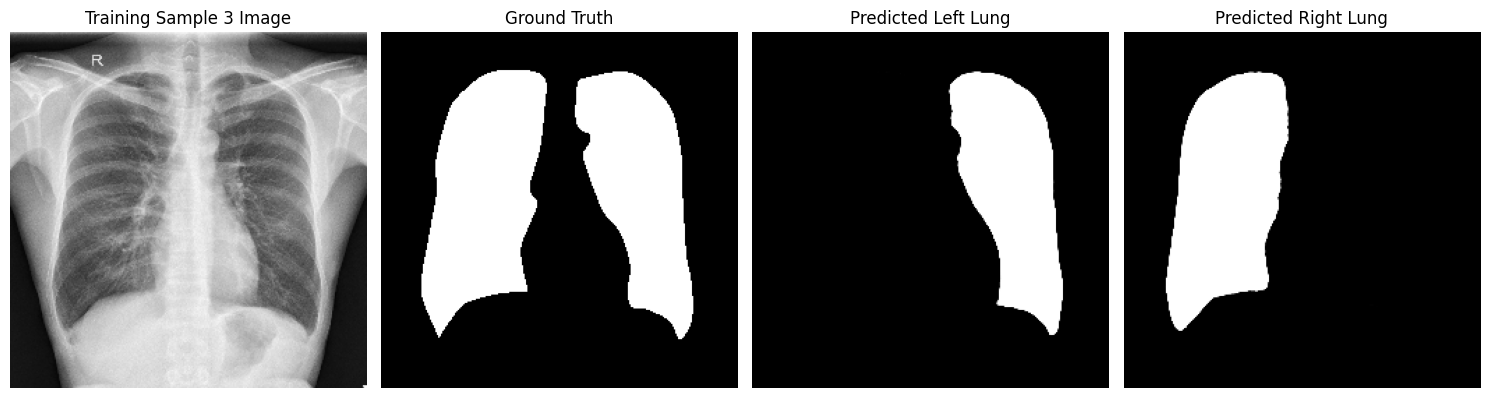


Validation Data Predictions:
Validation Sample 1 Dice Coefficient: 0.9702


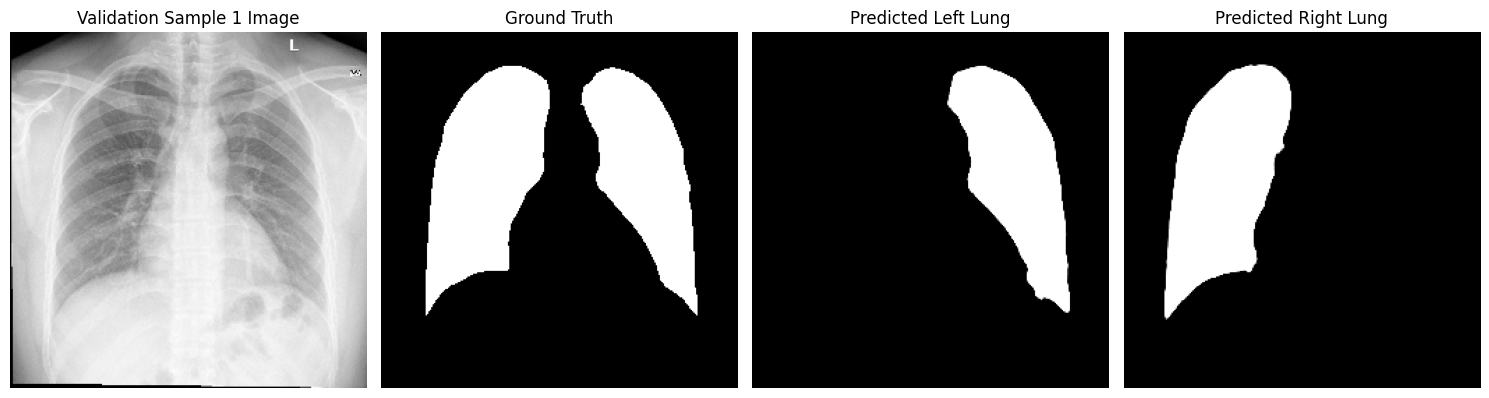

Validation Sample 2 Dice Coefficient: 0.9833


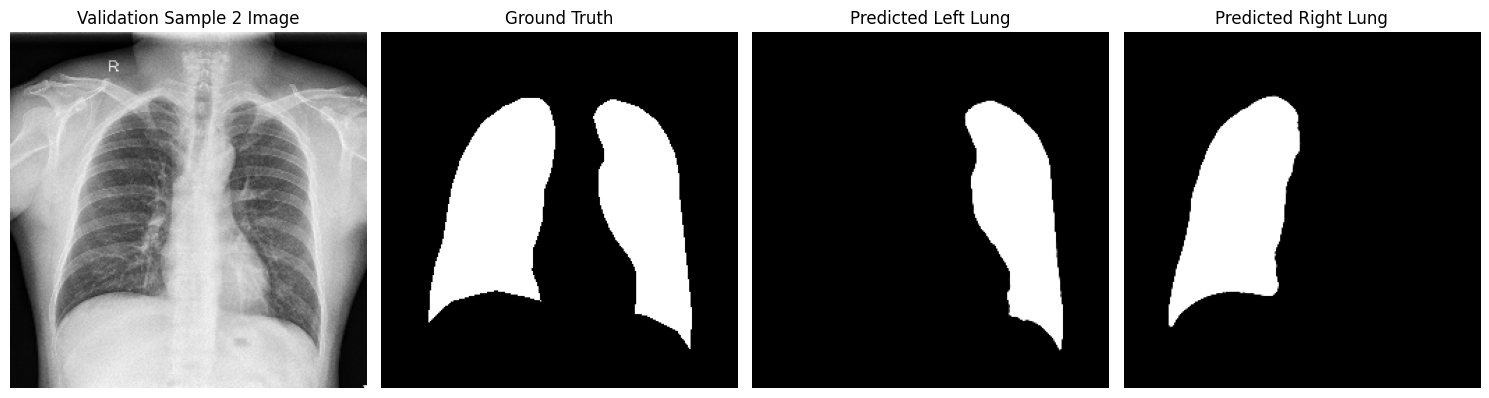

Validation Sample 3 Dice Coefficient: 0.9710


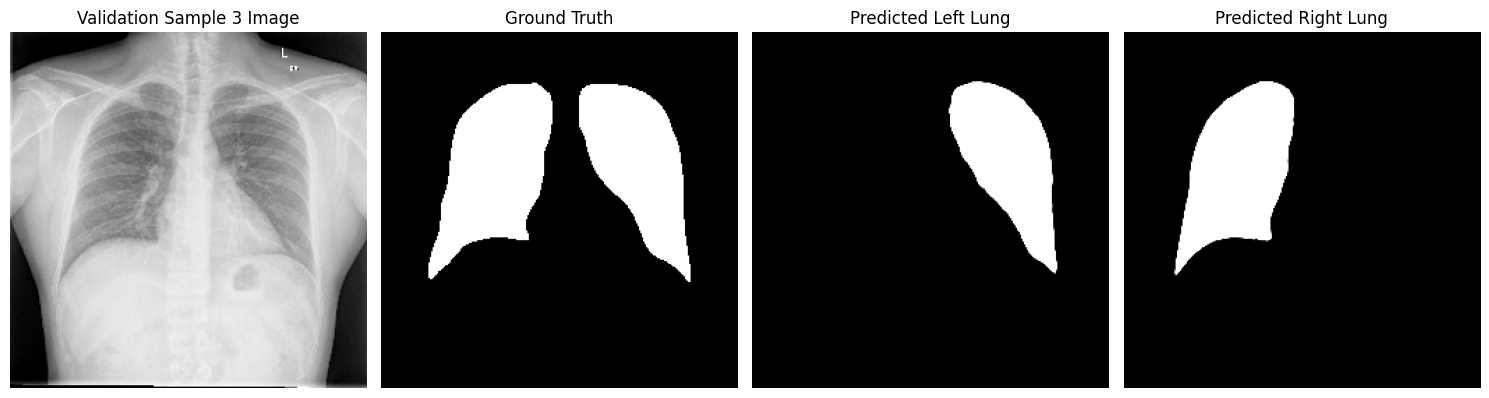


Test Data Predictions:
Test Sample 1 Dice Coefficient: 0.9827


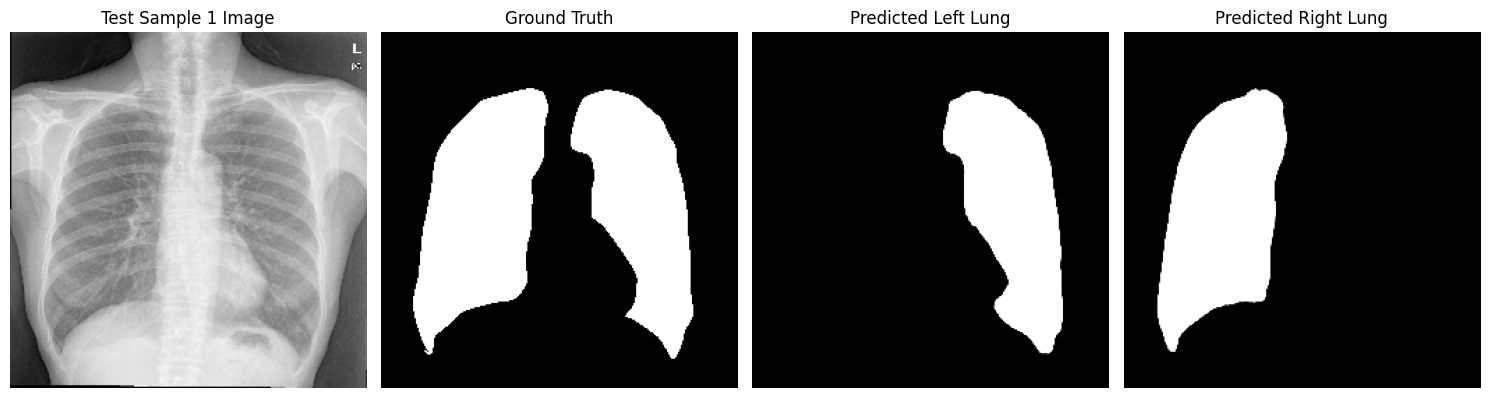

Test Sample 2 Dice Coefficient: 0.9534


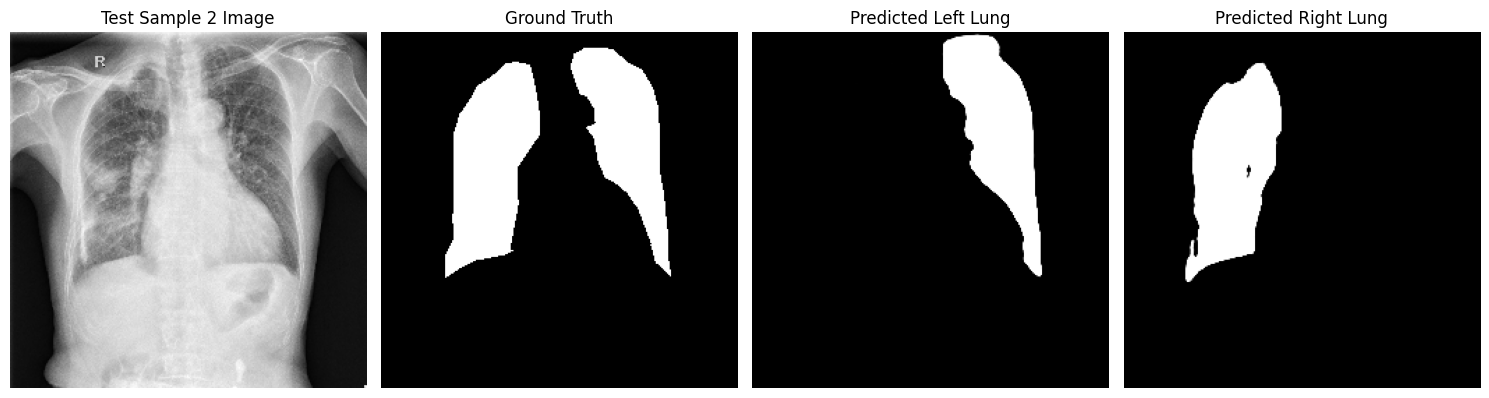

Test Sample 3 Dice Coefficient: 0.9816


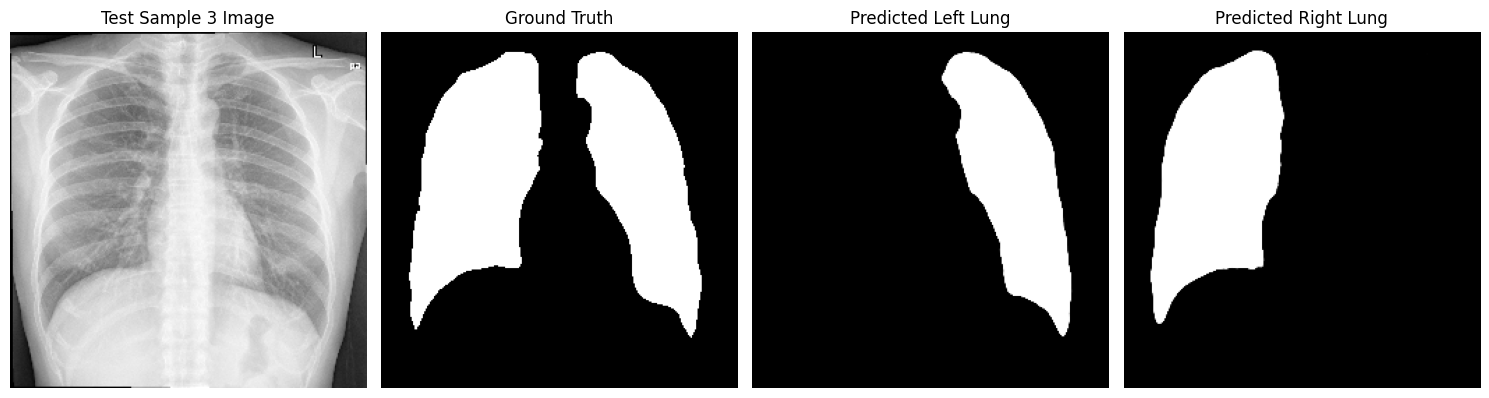

In [ ]:
import matplotlib.pyplot as plt

def plotPredictions(X_train_, y_train_, X_valid_, y_valid_, X_test_, y_test_, model):
    def plot_sample(X,y,pred,title_prefix):
        plt.figure(figsize=(15,5))

        #원본 이미지
        plt.subplot(1,4,1)
        plt.title(f"{title_prefix} Image")
        plt.imshow(X[0])
        plt.axis('off')

        #실제 마스크 (전체 폐)
        plt.subplot(1,4,2)
        plt.title("Ground Truth")

        #왼쪽 오른쪽 폐를 동시에 표시
        plt.imshow(y[0,:,:,1]+y[0,:,:,2], 'gray')
        plt.axis('off')

        #예측 마스크 (왼쪽 폐)
        plt.subplot(1,4,3)
        plt.title("Predicted Left Lung")
        plt.imshow(pred[0,:,:,1], 'gray')
        plt.axis('off')

        #예측 마스크 (오른쪽 폐)
        plt.subplot(1,4,4)
        plt.title("Predicted Right Lung")
        plt.imshow(pred[0,:,:,2],'gray')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    # 학습 데이터에서 3개 랜덤 샘플 예측
    print("Training Data Predictions:")
    for i in range(3):
        ix = np.random.randint(0, len(X_train_))
        input_ = X_train_[ix:ix+1]
        mask_ = y_train_[ix:ix+1]
        preds_train = model.predict(input_, verbose=0)
        ret = model.evaluate(input_, mask_,verbose=0)
        print(f"Training Sample {i+1} Dice Coefficient: {ret[1]:.4f}")
        plot_sample(input_, mask_, preds_train, f"Training Sample {i+1}")

    # 검증 데이터에서 3개 랜덤 샘플 예측
    print("\nValidation Data Predictions:")
    for i in range(3):
        ix = np.random.randint(0, len(X_valid_))
        input_ = X_valid_[ix:ix+1]
        mask_ = y_valid_[ix:ix+1]
        preds_valid = model.predict(input_, verbose=0)
        ret = model.evaluate(input_, mask_,verbose=0)
        print(f"Validation Sample {i+1} Dice Coefficient: {ret[1]:.4f}")
        plot_sample(input_, mask_, preds_valid, f"Validation Sample {i+1}")

    # 테스트 데이터에서 3개 랜덤 샘플 예측
    print("\nTest Data Predictions:")
    for i in range(3):
        ix = np.random.randint(0, len(X_test_))
        input_ = X_test_[ix:ix+1]
        mask_ = y_test_[ix:ix+1]
        preds_test = model.predict(input_, verbose=0)
        ret = model.evaluate(input_, mask_,verbose=0)
        print(f"Test Sample {i+1} Dice Coefficient: {ret[1]:.4f}")
        plot_sample(input_, mask_, preds_test, f"Test Sample {i+1}")

# 모델 예측 결과 시각화
plotPredictions(X_train, y_train, X_valid, y_valid, X_test, y_test, model)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step
=== Worst 5 Cases ===


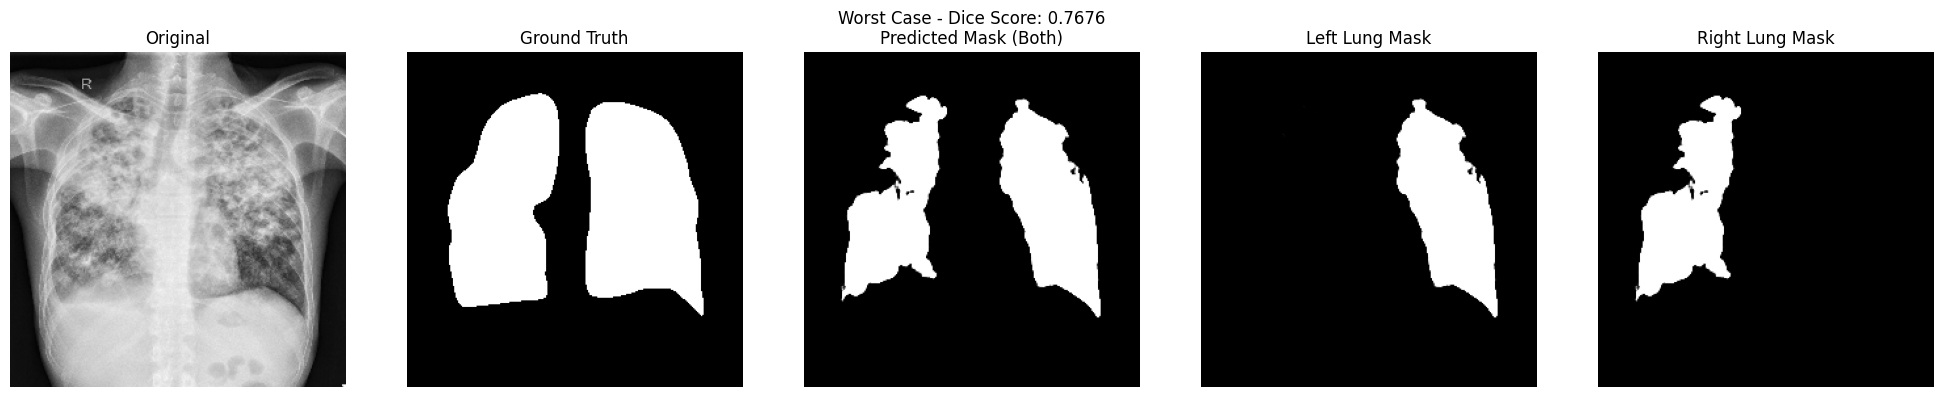

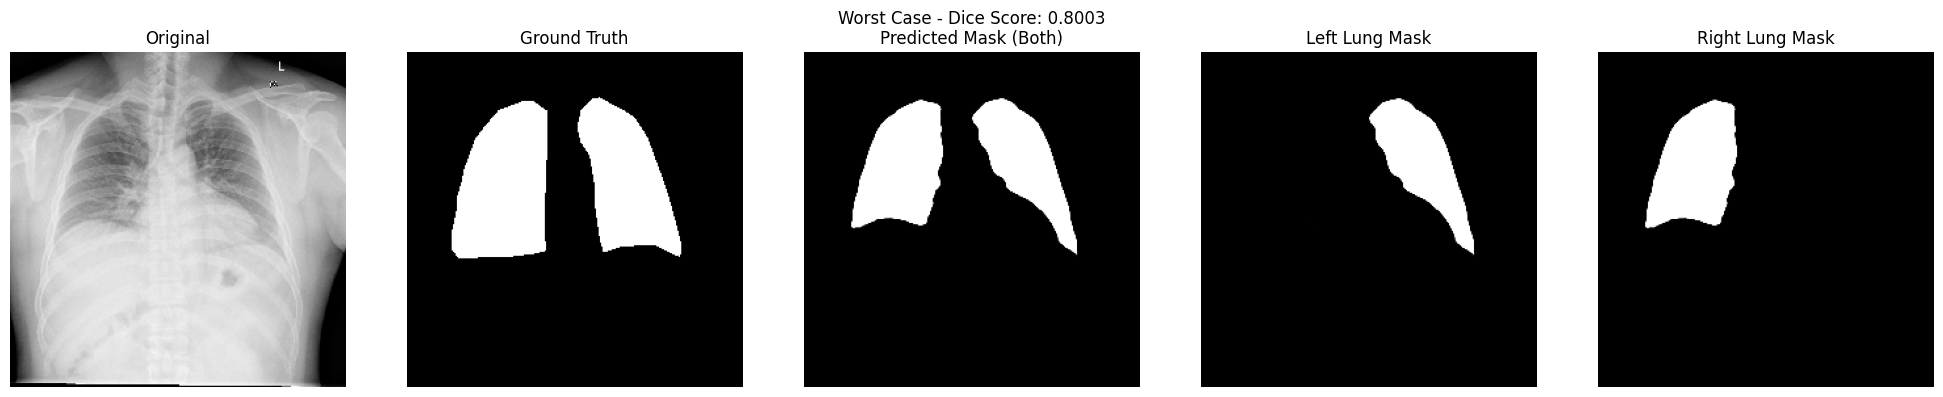

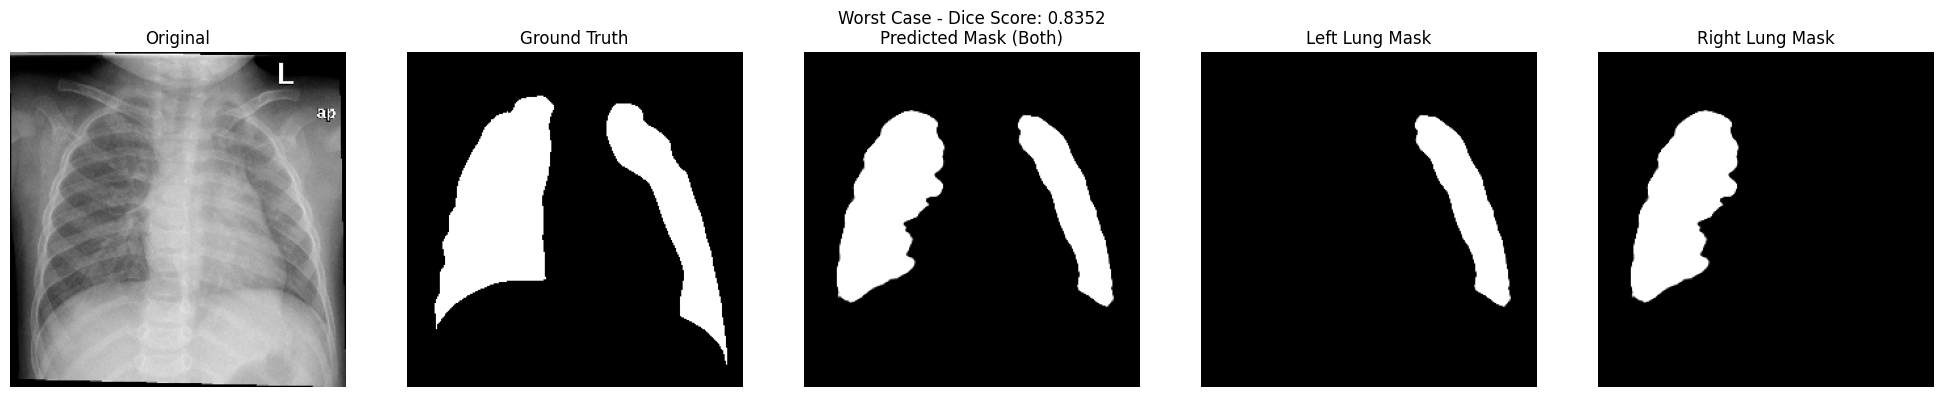

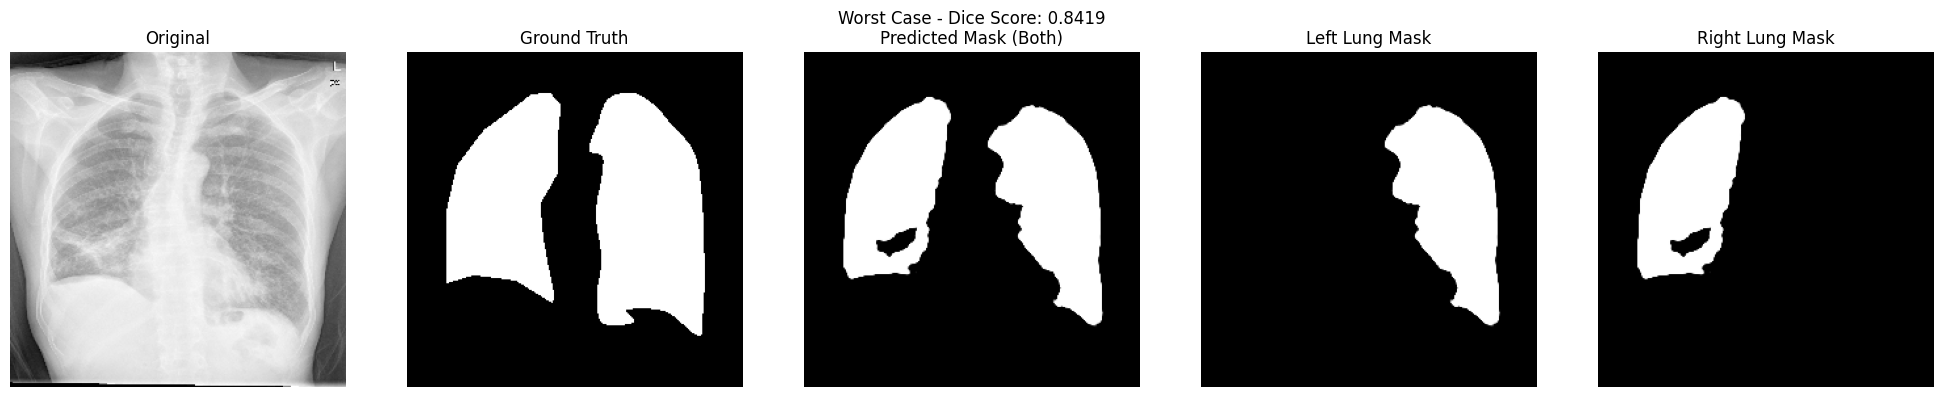

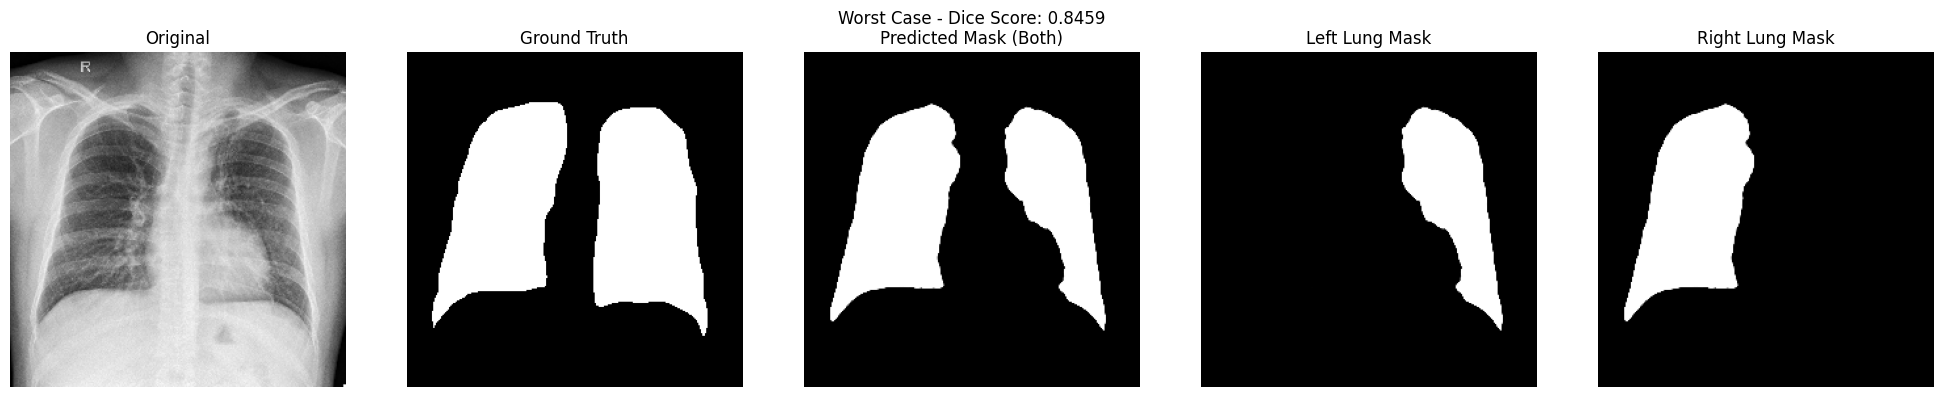


=== Best 5 Cases ===


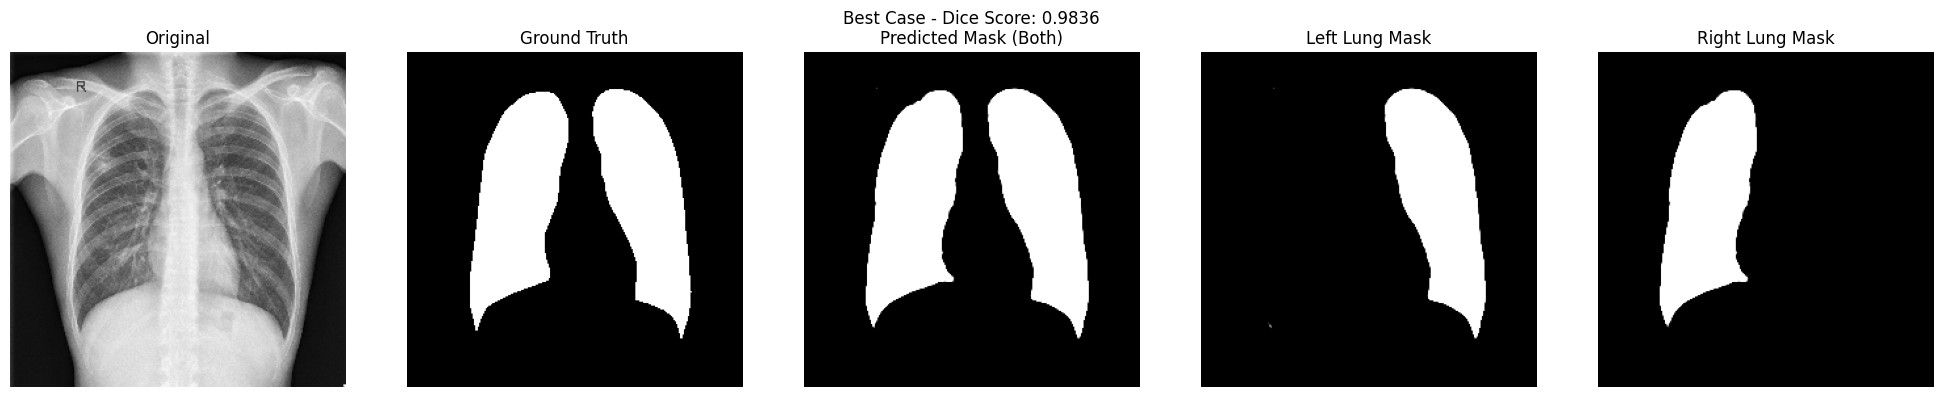

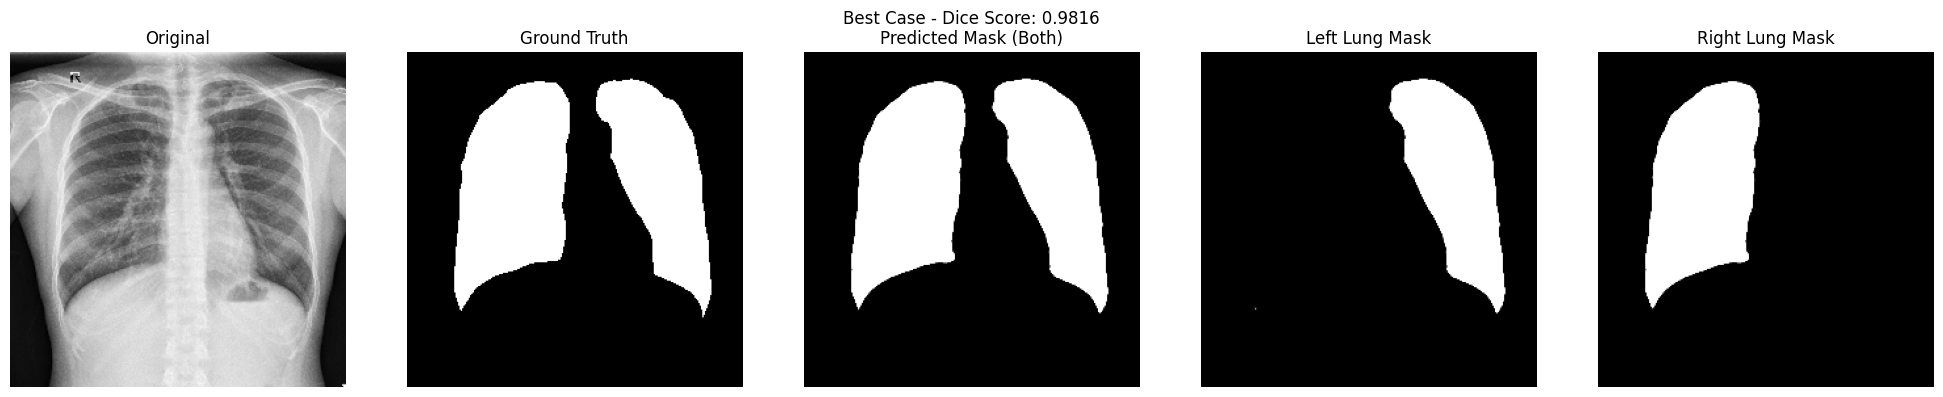

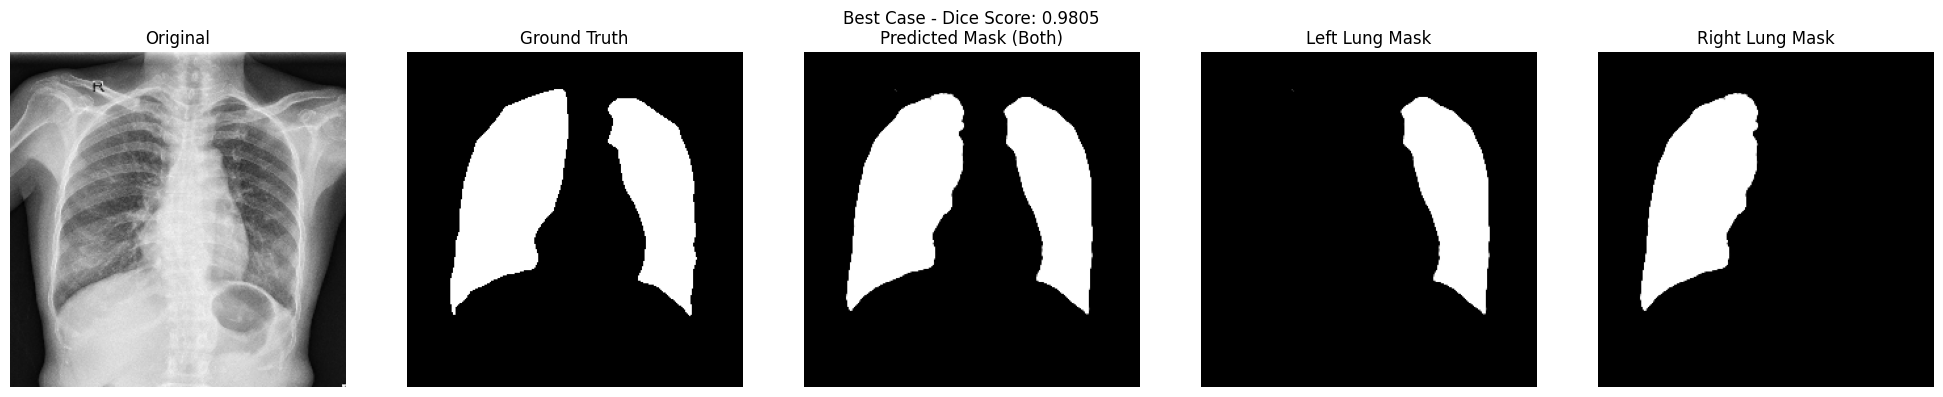

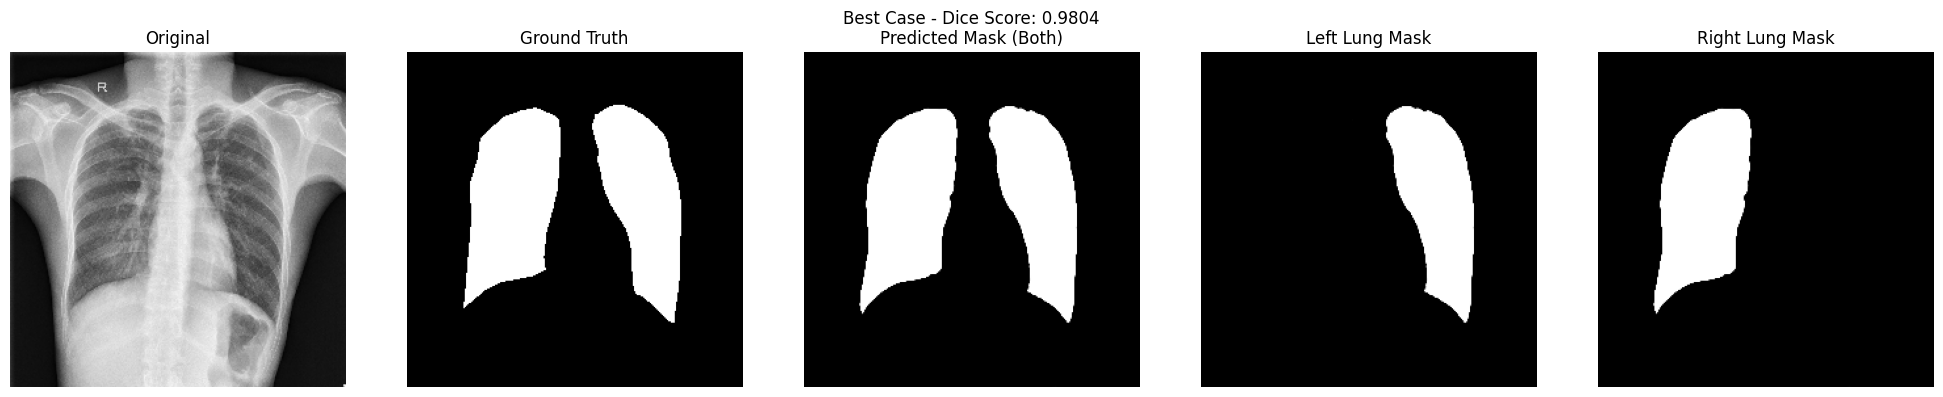

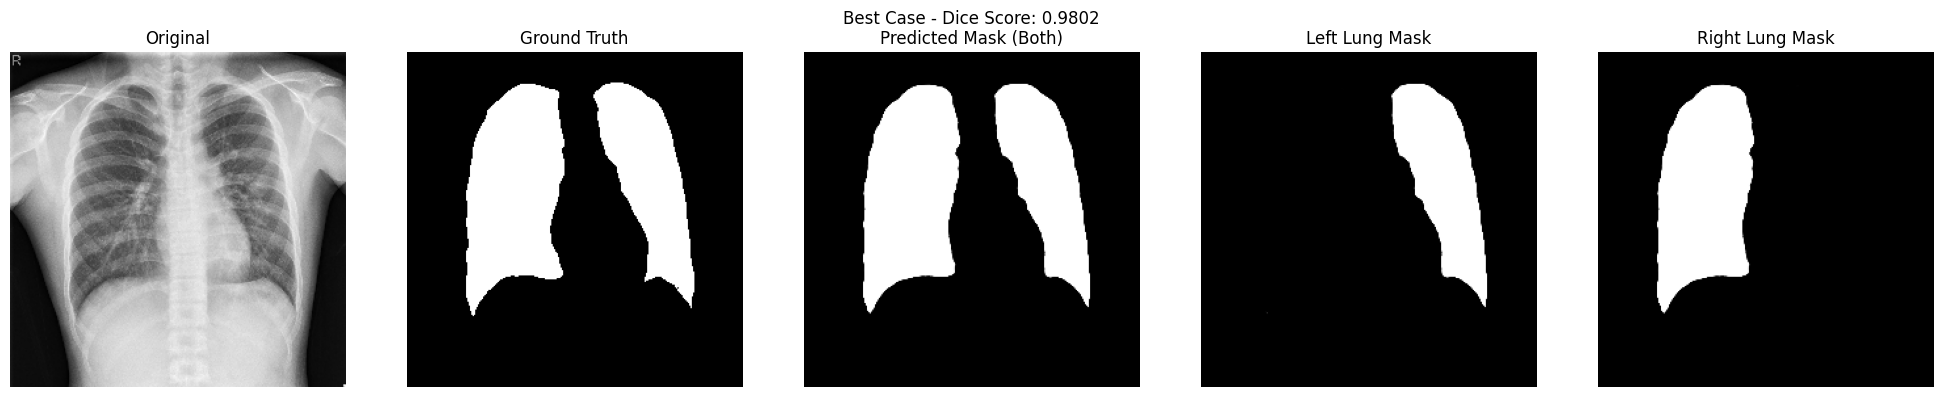

In [ ]:
# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 각 이미지별 평균 Dice coefficient 계산
dice_scores = []
for i in range(len(X_test)):
    # 왼쪽과 오른쪽 폐에 대한 Dice 계산 (배경 제외)
    y_true_left = np.expand_dims(y_test[i,:,:,1], axis=0)
    y_true_right = np.expand_dims(y_test[i,:,:,2], axis=0)
    y_pred_left = np.expand_dims(y_pred[i,:,:,1], axis=0)
    y_pred_right = np.expand_dims(y_pred[i,:,:,2], axis=0)

    # Dice 계산
    left_dice = dice_coef(y_true_left, y_pred_left).numpy()
    right_dice = dice_coef(y_true_right, y_pred_right).numpy()
    avg_dice = (left_dice + right_dice) / 2
    dice_scores.append((i, avg_dice))

# Dice score 기준으로 정렬
sorted_dice = sorted(dice_scores, key=lambda x: x[1])
worst_5 = sorted_dice[:5]  # 하위 5개
best_5 = sorted_dice[-5:]  # 상위 5개

def visualize_results(indices, title):
    for idx, score in indices:
        plt.figure(figsize=(20,4))
        plt.suptitle(f"{title} - Dice Score: {score:.4f}")

        plt.subplot(1,5,1)
        plt.title("Original")
        plt.imshow(X_test[idx])
        plt.axis('off')

        plt.subplot(1,5,2)
        plt.title("Ground Truth")
        plt.imshow(y_test[idx][:,:,1] + y_test[idx][:,:,2], 'gray')
        plt.axis('off')

        plt.subplot(1,5,3)
        plt.title("Predicted Mask (Both)")
        plt.imshow(y_pred[idx][:,:,1] + y_pred[idx][:,:,2], 'gray')
        plt.axis('off')

        plt.subplot(1,5,4)
        plt.title("Left Lung Mask")
        plt.imshow(y_pred[idx][:,:,1], 'gray')
        plt.axis('off')

        plt.subplot(1,5,5)
        plt.title("Right Lung Mask")
        plt.imshow(y_pred[idx][:,:,2], 'gray')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

# 시각화 실행
print("=== Worst 5 Cases ===")
visualize_results(worst_5, "Worst Case")

print("\n=== Best 5 Cases ===")
visualize_results(best_5[::-1], "Best Case")  # 역순으로 출력 (가장 좋은 것부터)